In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/BankNoteAuthentication .csv')
df

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
dtypes: float64(4)
memory usage: 43.0 KB


In [ ]:
df.describe()

,variance,skewness,curtosis,entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


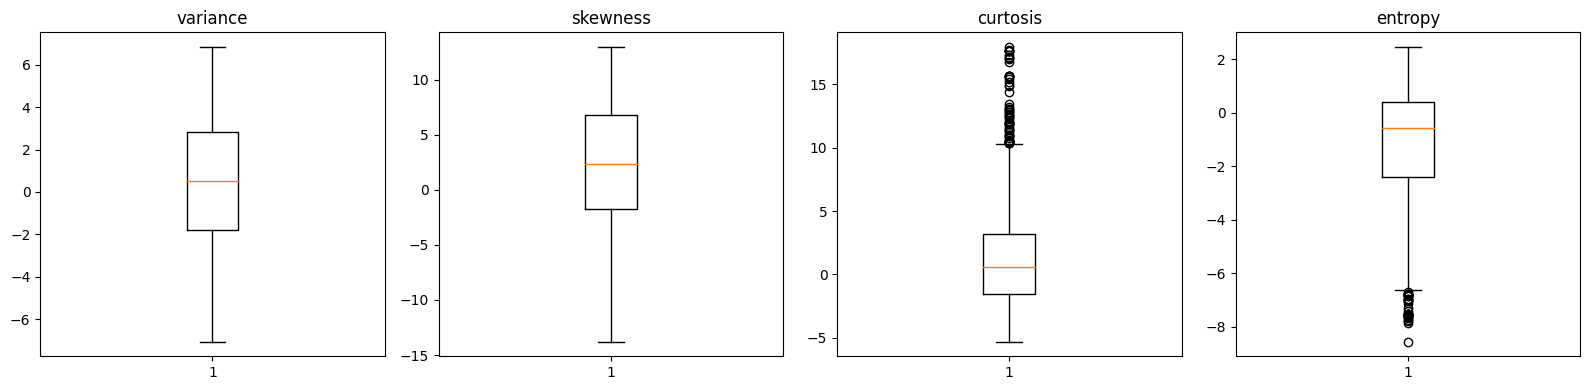

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(16, 4))

for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)

fig.tight_layout()

plt.show()

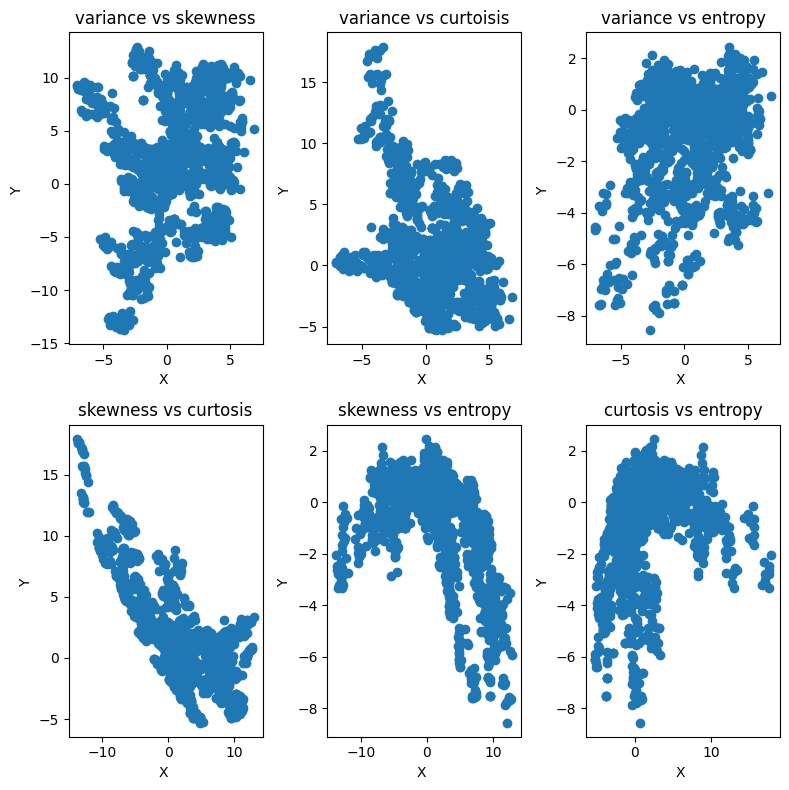

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8, 8))


axs[0, 0].scatter(df["variance"], df["skewness"])
axs[0, 0].set_title("variance vs skewness")
axs[0, 1].scatter(df["variance"], df["curtosis"])
axs[0, 1].set_title("variance vs curtoisis")
axs[0, 2].scatter(df["variance"], df["entropy"])
axs[0, 2].set_title("variance vs entropy")
axs[1, 0].scatter(df["skewness"], df["curtosis"])
axs[1, 0].set_title("skewness vs curtosis")
axs[1, 1].scatter(df["skewness"], df["entropy"])
axs[1, 1].set_title("skewness vs entropy")
axs[1, 2].scatter(df["curtosis"], df["entropy"])
axs[1, 2].set_title("curtosis vs entropy")


for ax in axs.flat:
    ax.set(xlabel='X ', ylabel='Y ')

fig.tight_layout()

plt.show()


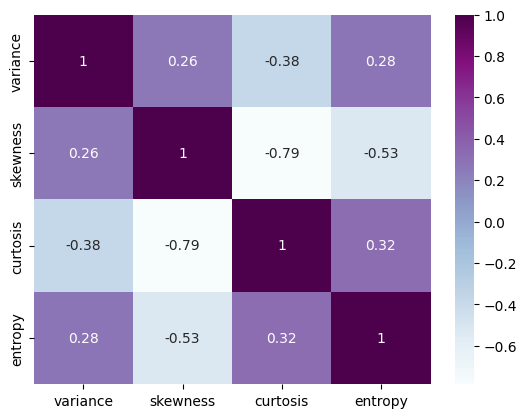

In [ ]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="BuPu")

plt.show()

In [ ]:
scaler = StandardScaler()

df1 = scaler.fit_transform(df)

df1 = pd.DataFrame(df1, columns=df.columns)
df1

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587
...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996
1368,-0.641313,-1.158984,1.179023,0.730127
1369,-1.472357,-2.621646,3.759017,-0.754884
1370,-1.406693,-1.756471,2.552043,-0.043158


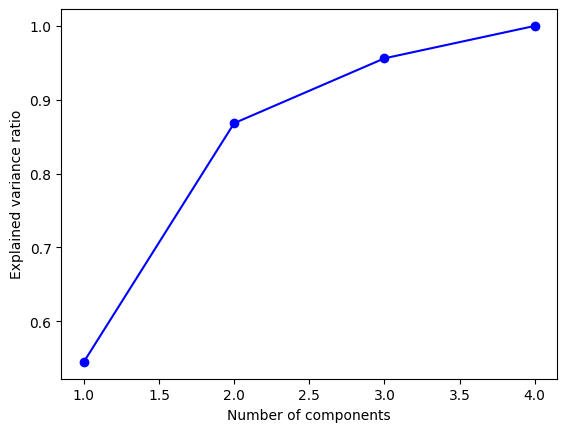

In [ ]:
pca_range = range(1, df.shape[1] + 1)
evr_list = []
for n_components in pca_range:
    pca = PCA(n_components=n_components)
    pca.fit(df1)
    evr = pca.explained_variance_ratio_
    evr_list.append(sum(evr))

plt.plot(pca_range, evr_list, 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()



**Uncomment Following 2 blocks for PCA and a segemnted data version of the same algorithms**

In [ ]:
# pca = PCA(n_components=3)

# pca.fit(df1)

# transformed_df = pca.transform(df1)

# new_df = pd.DataFrame(transformed_df, columns=["PC1", "PC2", "PC3"])

# new_df

In [ ]:
# fig, axs = plt.subplots(nrows=1, ncols=len(new_df.columns), figsize=(16, 3))

# for i, col in enumerate(new_df.columns):
#     axs[i].boxplot(new_df[col])
#     axs[i].set_title(col)

# fig.tight_layout()

# plt.show()

In [ ]:
param_grid = {'n_clusters': [2,3,4,5,6], 'init': ['k-means++', 'random'], 'max_iter': [100, 300, 500]}
kmeans = KMeans()
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5)
grid_search.fit(df1)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)



Best parameters:  {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 6}
Best score:  -310.3203824052558


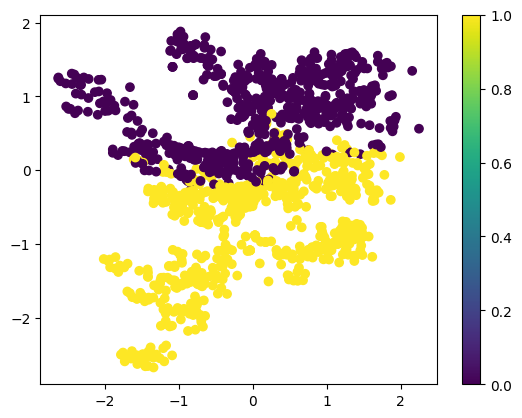

In [ ]:
kmeans = KMeans(n_clusters=2, max_iter=100, init='k-means++')
labels = kmeans.fit_predict(df1)


plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.show()

In [ ]:
silhouette = silhouette_score(df1, labels)
print("Silhouette score:", silhouette)

db_index = davies_bouldin_score(df1, labels)
print("Davies-Bouldin index:", db_index)

Silhouette score: 0.32905546282335313
Davies-Bouldin index: 1.1999630554441354


In [ ]:
param_grid = {'eps': [0.1, 0.5, 1, 1.5],
              'min_samples': [2, 5, 10, 20]}

dbscan = DBSCAN()

grid_search = GridSearchCV(dbscan, param_grid=param_grid, scoring=silhouette_score)
grid_search.fit(df1)

print("Best parameters:", grid_search.best_params_)
print("Best silhouette score:", grid_search.best_score_)


Best parameters: {'eps': 0.1, 'min_samples': 2}
Best silhouette score: nan


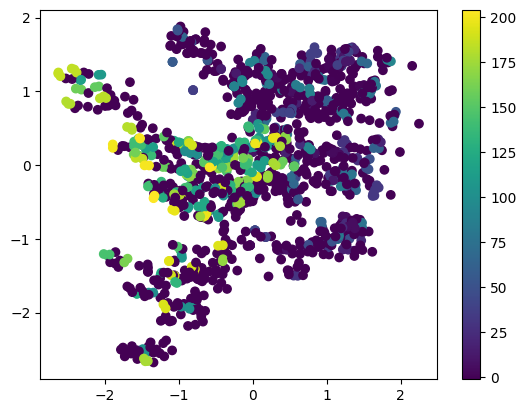

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=2)

dbscan.fit(df1)

labels1 = dbscan.labels_


plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1], c=labels1, cmap='viridis')
plt.colorbar()
plt.show()


In [ ]:
silhouette = silhouette_score(df1, labels1)
print("Silhouette score:", silhouette)

db_index = davies_bouldin_score(df1, labels1)
print("Davies-Bouldin index:", db_index)

Silhouette score: -0.21208493624096683
Davies-Bouldin index: 1.2834868308340335


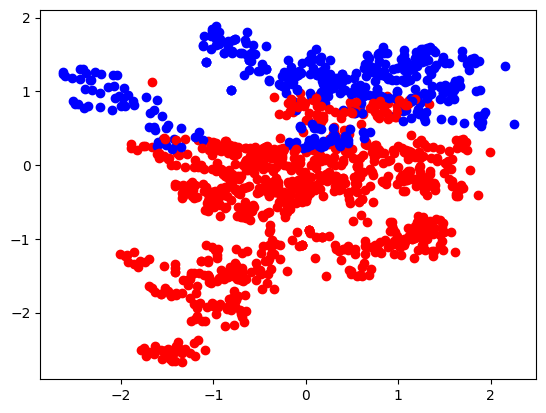

In [ ]:
from sklearn.cluster import AgglomerativeClustering


agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')

agg_cluster.fit(df1)

labels2 = agg_cluster.labels_

colors = ['red', 'blue']


for i in range(len(df1)):
    plt.scatter(df1.iloc[i, 0], df1.iloc[i, 1], color=colors[labels2[i]])


plt.show()


In [ ]:
silhouette = silhouette_score(df1, labels2)
print("Silhouette score:", silhouette)

db_index = davies_bouldin_score(df1, labels2)
print("Davies-Bouldin index:", db_index)

Silhouette score: 0.31304117612852056
Davies-Bouldin index: 1.2269935251648094


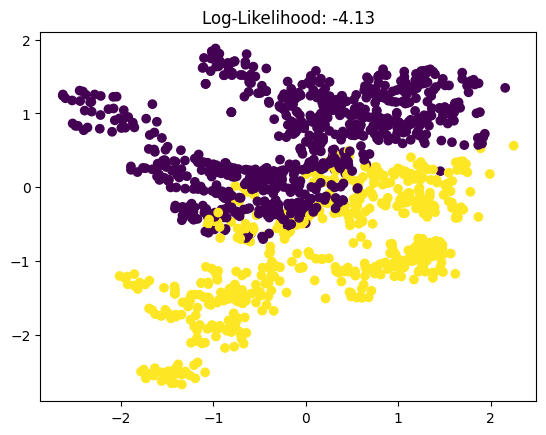

In [ ]:
n_components = 2
model = GaussianMixture(n_components=n_components, random_state=0)

model.fit(df1)

y_pred = model.predict(df1)

log_likelihood = model.score(df1)

plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1], c=y_pred, cmap='viridis')
plt.title(f'Log-Likelihood: {log_likelihood:.2f}')
plt.show()

